This model predicts if a bank currency note is authentic or not based upon four attributes of the note i.e. skewness of the wavelet transformed image, variance of the image, entropy of the image, and curtosis of the image.

**Importing the libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Reading the dataset using Pandas**

In [3]:
df= pd.read_csv('bill_authentication.csv')


  **Exploratory Data Analysis**

In [4]:
df.shape


(1372, 5)

In [5]:
df.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


**Checking for NaN values in the dataframe**


In [6]:
df.isnull()

,Variance,Skewness,Curtosis,Entropy,Class
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
1367,False,False,False,False,False
1368,False,False,False,False,False
1369,False,False,False,False,False
1370,False,False,False,False,False


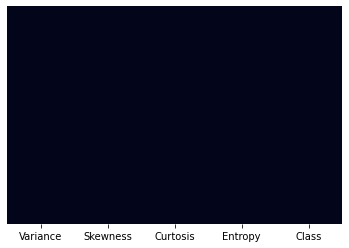

In [8]:
sns.heatmap(df.isnull(), yticklabels= False, cbar= False )

The above heatmap shows that there are no NaN values in the given dataframe


In [9]:
df.corr()

,Variance,Skewness,Curtosis,Entropy,Class
Variance,1.000000,0.264026,-0.380850,0.276817,-0.724843
Skewness,0.264026,1.000000,-0.786895,-0.526321,-0.444688
Curtosis,-0.380850,-0.786895,1.000000,0.318841,0.155883
Entropy,0.276817,-0.526321,0.318841,1.000000,-0.023424
Class,-0.724843,-0.444688,0.155883,-0.023424,1.000000


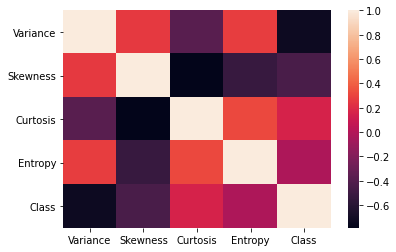

In [10]:
sns.heatmap(df.corr())

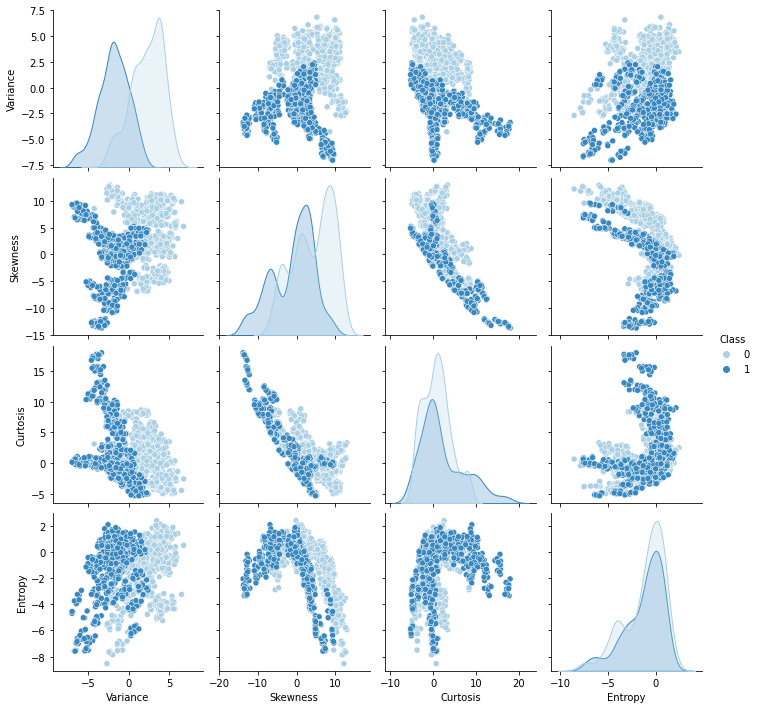

In [12]:
sns.pairplot(data=df, hue= 'Class', palette= 'Blues')

In [13]:
x= df.iloc[:, :-1]
y= df.iloc[:, -1]

In [14]:
x.head()

,Variance,Skewness,Curtosis,Entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


Splitting the dataset into training and test set


In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size= 0.25, random_state=0)

In [16]:
x_train.shape

(1029, 4)

Training the model using SVC

In [18]:
from sklearn.svm import SVC
classifier= SVC(kernel= 'linear')
classifier.fit(x_train, y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Predicting using the test set

In [19]:
classifier_pred= classifier.predict(x_test)

In [22]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,classifier_pred))
print(classification_report(y_test,classifier_pred))

[[190   5]
 [  0 148]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       195
           1       0.97      1.00      0.98       148

    accuracy                           0.99       343
   macro avg       0.98      0.99      0.99       343
weighted avg       0.99      0.99      0.99       343



In [23]:
accuracy_score(y_test, classifier_pred)

0.9854227405247813

Accuracy score and Classification Report show that the algorithm performs efficiently with an accuracy of 0.98 and just 5 misclassifications.